In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("cicids2017_cleaned.csv")
print(df)

         Destination Port  Flow Duration  Total Fwd Packets  \
0                      22        1266342                 41   
1                      22        1319353                 41   
2                      22            160                  1   
3                      22        1303488                 41   
4                   35396             77                  1   
...                   ...            ...                ...   
2176784                80              6                  4   
2176785                80            989                  4   
2176786                80           1996                  5   
2176787                80           9986                  2   
2176788                80            995                  5   

         Total Length of Fwd Packets  Fwd Packet Length Max  \
0                               2664                    456   
1                               2664                    456   
2                                  0                  

In [3]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,...,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Max,Active Min,Idle Mean,Idle Max,Idle Min,Attack Type
0,22,1266342,41,2664,456,0,64.975610,109.864573,976,0,...,243.0,24.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal Traffic
1,22,1319353,41,2664,456,0,64.975610,109.864573,976,0,...,243.0,24.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal Traffic
2,22,160,1,0,0,0,0.000000,0.000000,0,0,...,243.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal Traffic
3,22,1303488,41,2728,456,0,66.536585,110.129945,976,0,...,243.0,24.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal Traffic
4,35396,77,1,0,0,0,0.000000,0.000000,0,0,...,290.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal Traffic


In [4]:
df.shape

(2176789, 53)

In [10]:
df.describe(include='all')

,Destination Port,Flow Duration,Total Fwd Packets,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,...,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Max,Active Min,Idle Mean,Idle Max,Idle Min,Attack Type
count,2.176789e+06,2.176789e+06,2.176789e+06,2.176789e+06,2.176789e+06,2.176789e+06,2.176789e+06,2.176789e+06,2.176789e+06,2.176789e+06,...,2.176788e+06,2.176788e+06,2.176788e+06,2.176788e+06,2.176788e+06,2.176788e+06,2.176788e+06,2.176788e+06,2.176788e+06,2176788
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal Traffic
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1771571
mean,8.594698e+03,1.746800e+07,1.085688e+01,6.159028e+02,2.392578e+02,1.889730e+01,6.532005e+01,8.079991e+01,1.048996e+03,4.140317e+01,...,2.234946e+03,6.366023e+00,-3.573498e+03,9.408603e+04,1.734879e+05,6.800550e+04,1.022371e+07,1.070098e+07,9.731699e+06,NaN
std,1.894136e+04,3.595384e+07,8.542188e+02,1.069029e+04,7.897635e+02,6.327967e+01,2.055572e+02,3.123329e+02,2.133806e+03,6.973294e+01,...,8.892523e+03,7.250349e+02,1.237278e+06,7.006857e+05,1.084684e+06,6.288625e+05,2.610042e+07,2.691330e+07,2.582979e+07,NaN
min,0.000000e+00,-1.300000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-1.000000e+00,0.000000e+00,-5.368707e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
25%,5.300000e+01,2.070000e+02,2.000000e+00,1.200000e+01,6.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,...,-1.000000e+00,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
50%,8.000000e+01,5.727300e+04,2.000000e+00,6.600000e+01,4.000000e+01,2.000000e+00,3.600000e+01,0.000000e+00,9.800000e+01,0.000000e+00,...,0.000000e+00,1.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
75%,4.430000e+02,5.556644e+06,6.000000e+00,3.400000e+02,2.200000e+02,3.600000e+01,5.206250e+01,7.713578e+01,9.370000e+02,7.900000e+01,...,2.350000e+02,3.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2176789 entries, 0 to 2176788
Data columns (total 53 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Destination Port             int64  
 1   Flow Duration                int64  
 2   Total Fwd Packets            int64  
 3   Total Length of Fwd Packets  int64  
 4   Fwd Packet Length Max        int64  
 5   Fwd Packet Length Min        int64  
 6   Fwd Packet Length Mean       float64
 7   Fwd Packet Length Std        float64
 8   Bwd Packet Length Max        int64  
 9   Bwd Packet Length Min        int64  
 10  Bwd Packet Length Mean       float64
 11  Bwd Packet Length Std        float64
 12  Flow Bytes/s                 float64
 13  Flow Packets/s               float64
 14  Flow IAT Mean                float64
 15  Flow IAT Std                 float64
 16  Flow IAT Max                 float64
 17  Flow IAT Min                 float64
 18  Fwd IAT Total                float64
 19  

In [9]:
df.columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Length of Fwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd Header Length', 'Bwd Header Length',
       'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length',
       'Max Packet Length', 'Packet Length Mean', 'Packet Length Std',
       'Packet Length Variance', 'FIN Flag Count', 'PSH Flag Count',
       'ACK Flag Count', 'Average Packet Size', 'Subflow Fwd Bytes',
       'Init_Win_bytes_forward', 'Init_Win_bytes_backward', 'act_data_p

<ipython-input-11-fabcdc184344>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Attack Type', order=df['Attack Type'].value_counts().index, palette='coolwarm')


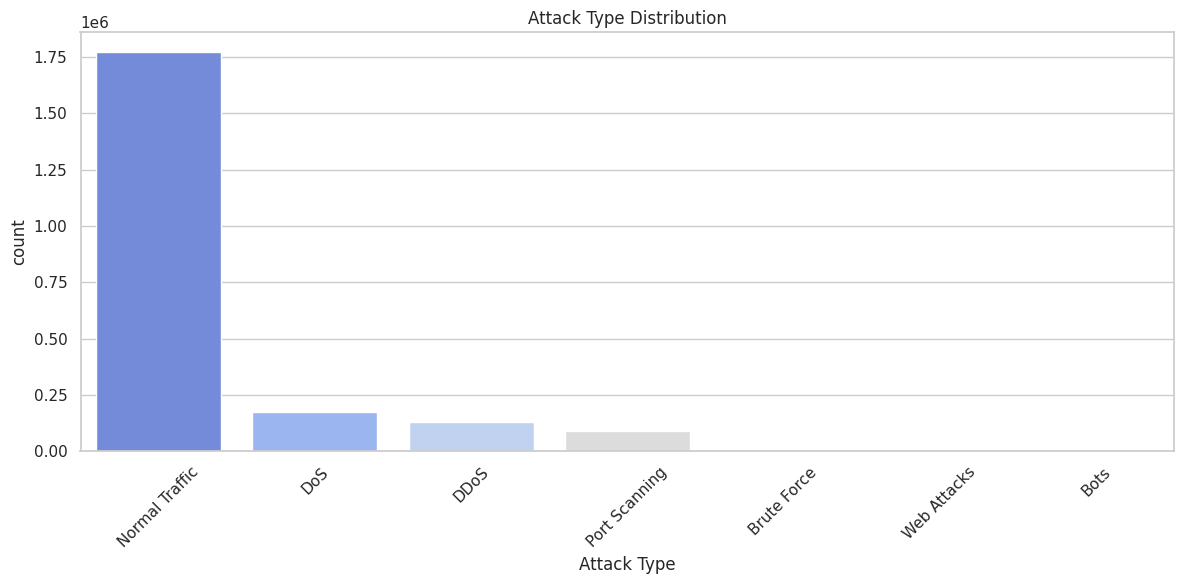

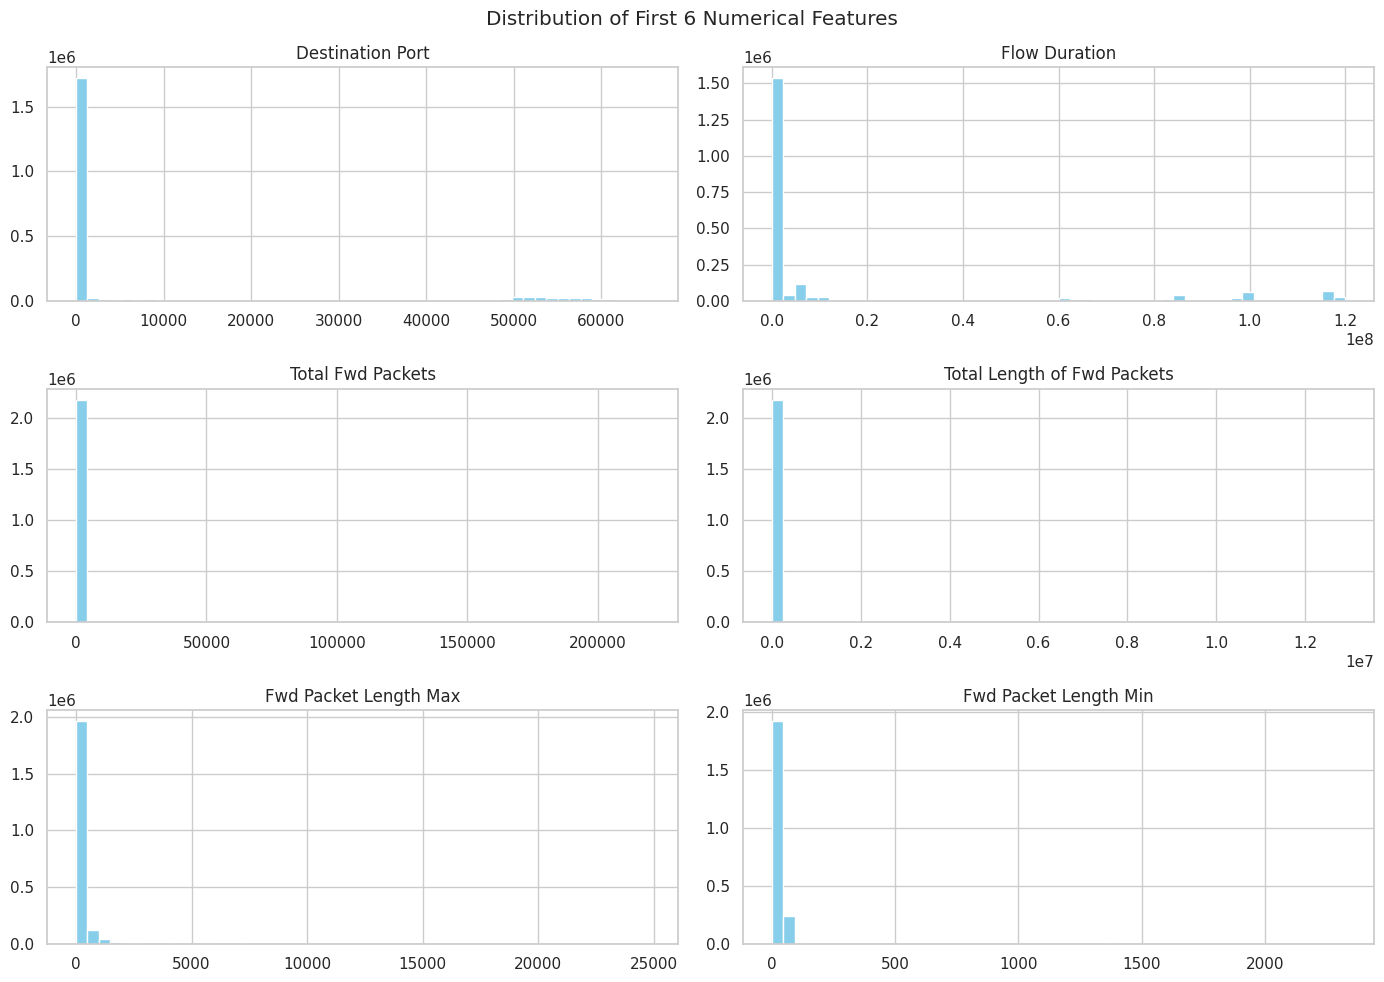

In [11]:
# Univariate Analysis
# 1. Attack Type count
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Attack Type', order=df['Attack Type'].value_counts().index, palette='coolwarm')
plt.title('Attack Type Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Histogram of numeric features (first 6 only for brevity)
num_features = df.select_dtypes(include=np.number).columns[:6]
df[num_features].hist(figsize=(14, 10), bins=50, color='skyblue')
plt.suptitle("Distribution of First 6 Numerical Features")
plt.tight_layout()
plt.show()

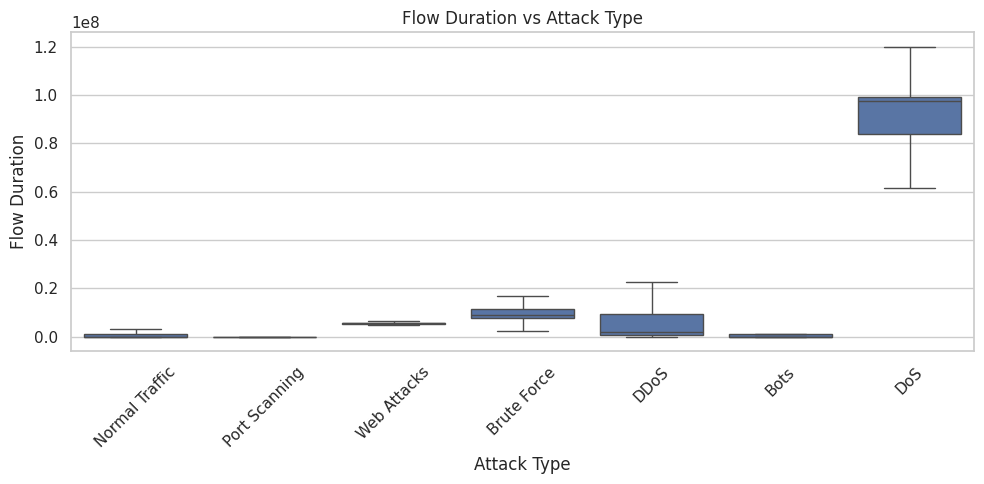

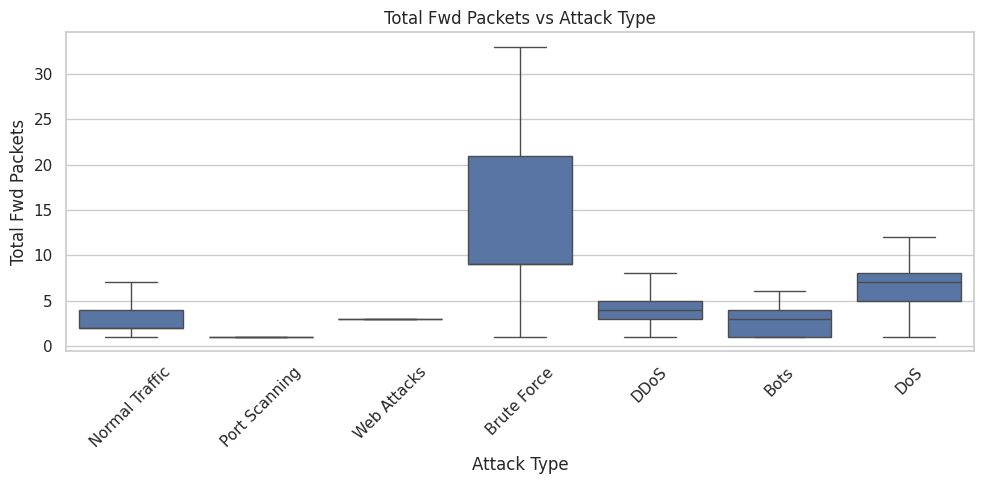

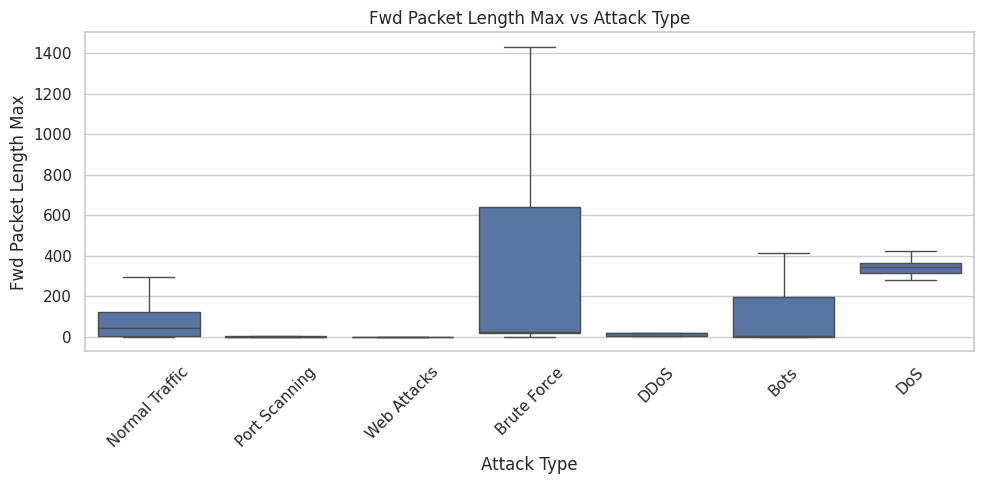

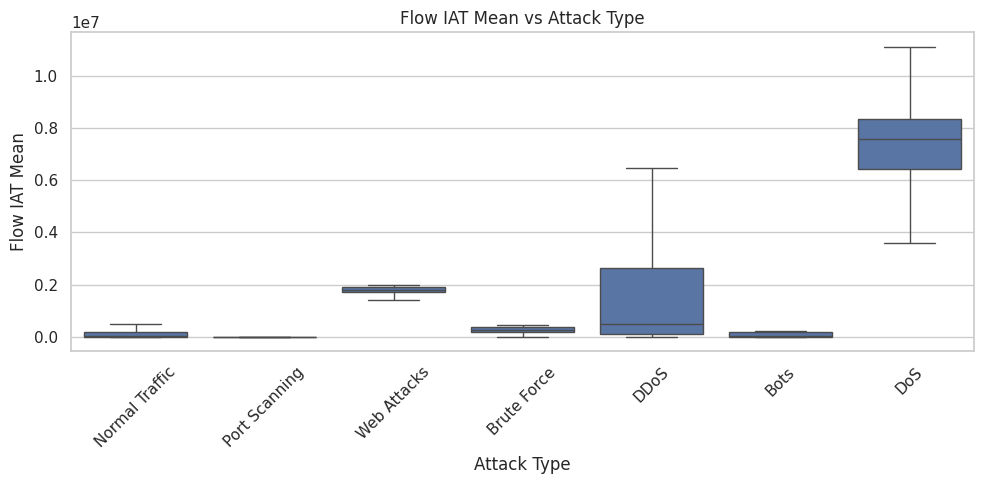

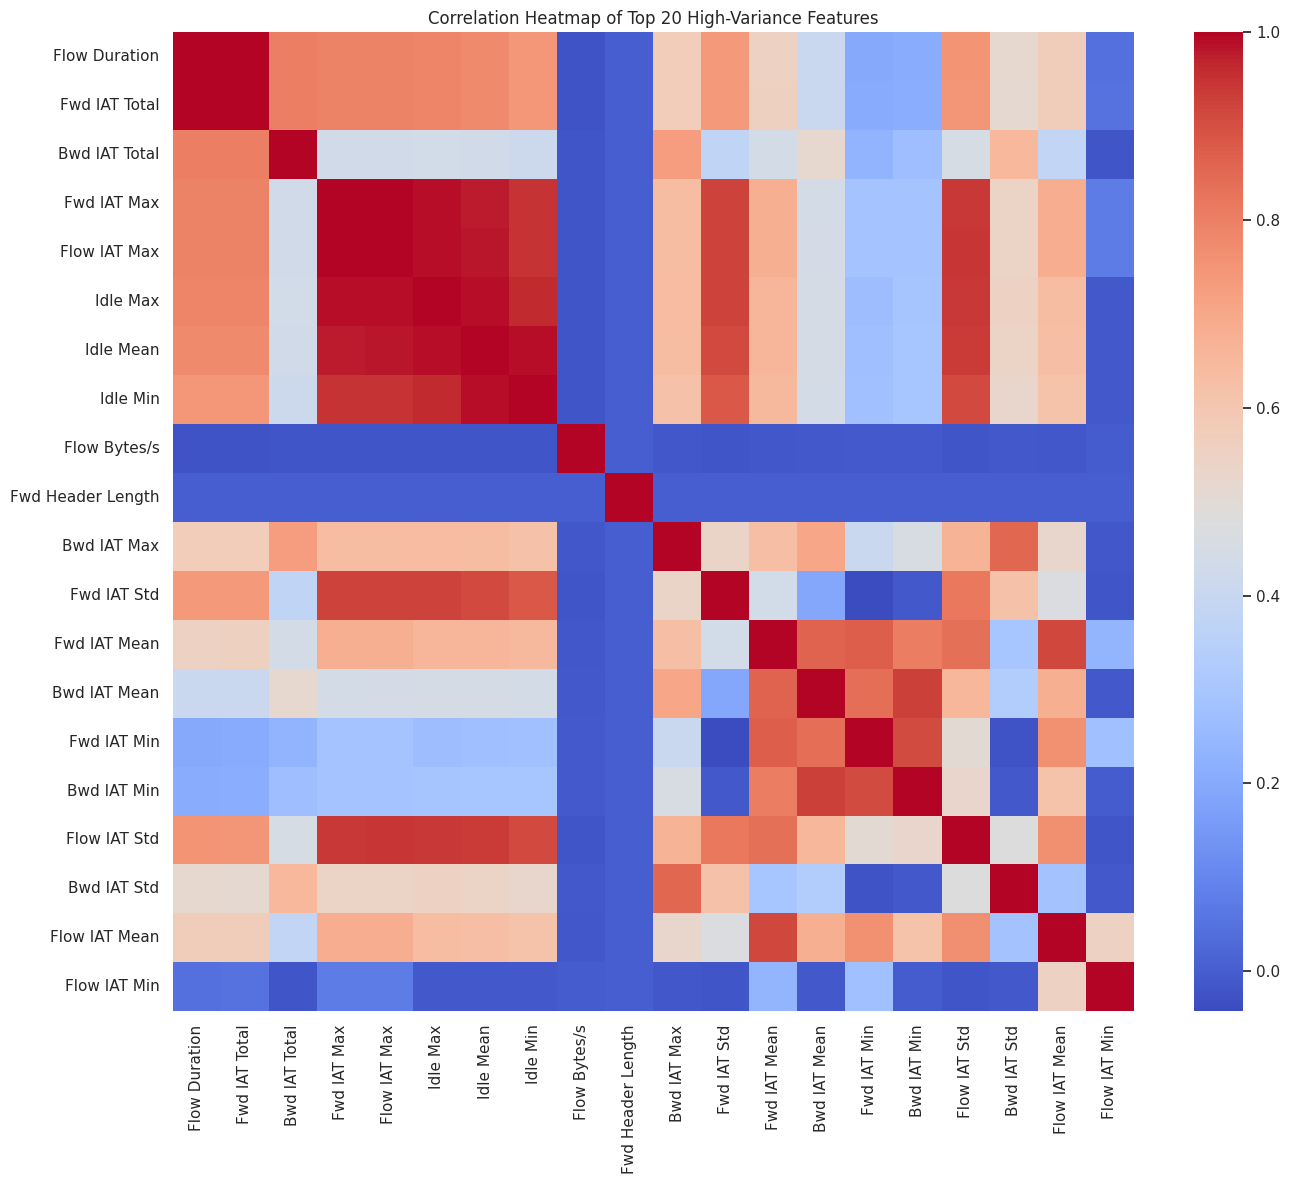

In [12]:
#Bivariate Analysis
# 3. Boxplots by Attack Type for selected important features
selected_features = ['Flow Duration', 'Total Fwd Packets', 'Fwd Packet Length Max', 'Flow IAT Mean']
for feature in selected_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df, x='Attack Type', y=feature, showfliers=False)
    plt.xticks(rotation=45)
    plt.title(f'{feature} vs Attack Type')
    plt.tight_layout()
    plt.show()

# 4. Correlation heatmap (top 20 features with highest variance)
top_var = df.select_dtypes(include=np.number).var().sort_values(ascending=False).head(20).index
plt.figure(figsize=(14, 12))
sns.heatmap(df[top_var].corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap of Top 20 High-Variance Features")
plt.tight_layout()
plt.show()

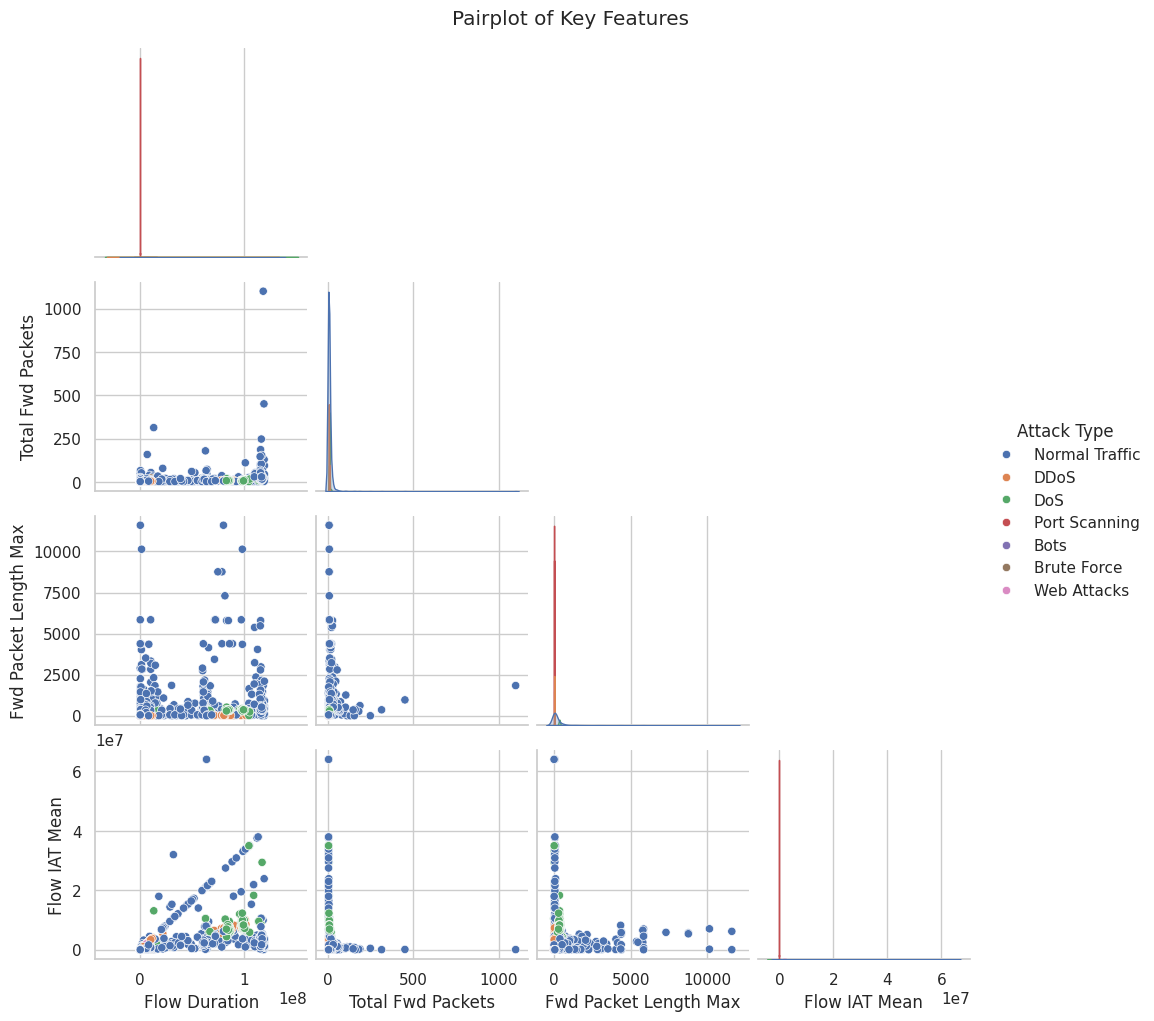

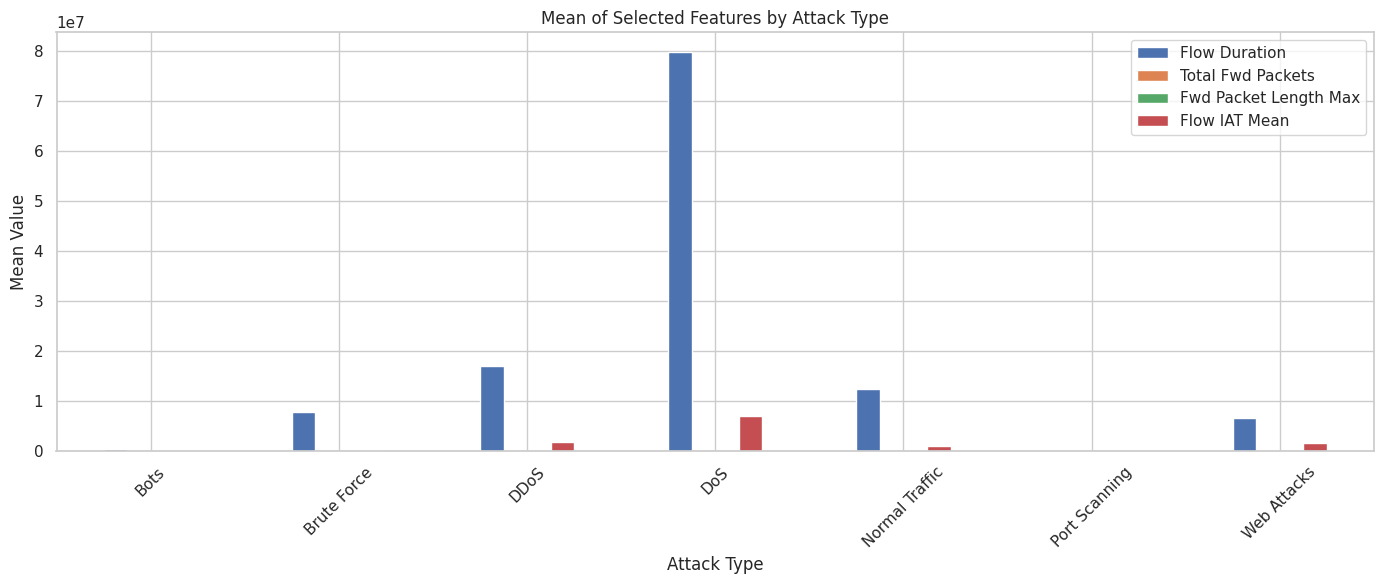

In [13]:
# Multivariate Analysis
# 5. Pairplot (small sample due to large size)
sample_df = df[selected_features + ['Attack Type']].sample(n=3000, random_state=42)
sns.pairplot(sample_df, hue='Attack Type', corner=True)
plt.suptitle("Pairplot of Key Features", y=1.02)
plt.show()

# 6. Grouped feature means by Attack Type
grouped_means = df.groupby('Attack Type')[selected_features].mean()
grouped_means.plot(kind='bar', figsize=(14, 6))
plt.title("Mean of Selected Features by Attack Type")
plt.xticks(rotation=45)
plt.ylabel("Mean Value")
plt.tight_layout()
plt.show()

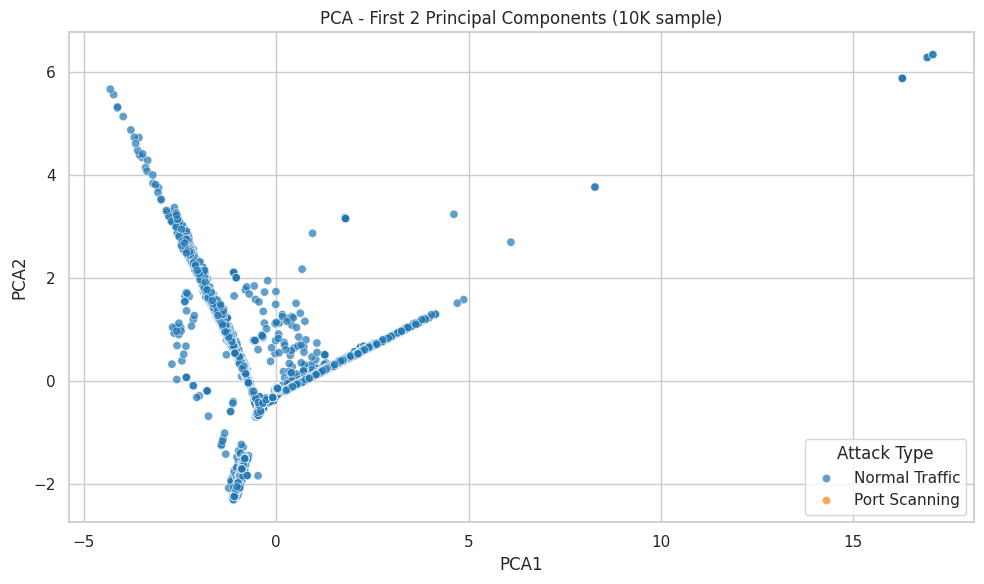

In [16]:
# Dimentionality Reduction
# 7. PCA Visualization (on numeric data only)
features_for_pca = df.select_dtypes(include=np.number).dropna(axis=1)  # drop NaNs
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features_for_pca)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data[:10000])  # limit for performance
pca_df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])
pca_df['Attack Type'] = df['Attack Type'].iloc[:10000].values

plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Attack Type', palette='tab10', alpha=0.7)
plt.title("PCA - First 2 Principal Components (10K sample)")
plt.tight_layout()
plt.show()

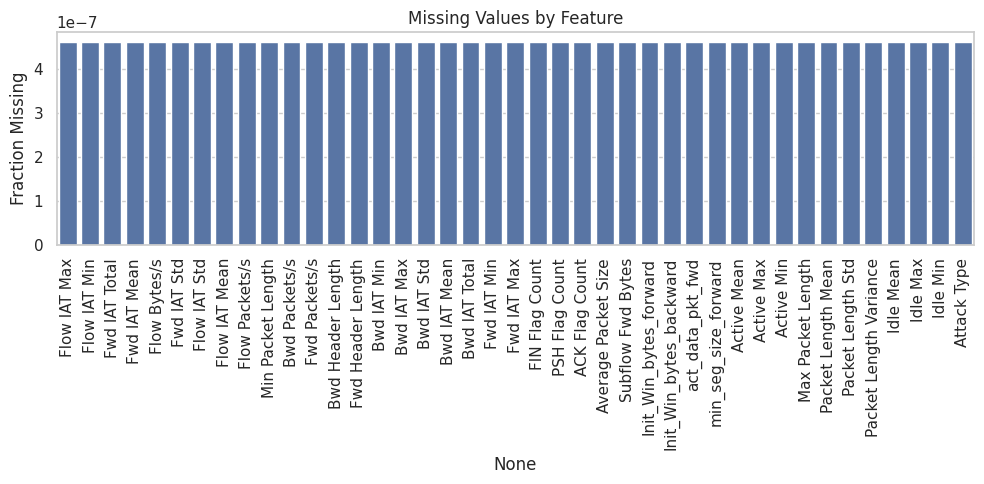

In [17]:
# Missing Value Check
# 8. Missing values
missing = df.isnull().mean().sort_values(ascending=False)
missing = missing[missing > 0]
if not missing.empty:
    plt.figure(figsize=(10, 5))
    sns.barplot(x=missing.index, y=missing.values)
    plt.title("Missing Values by Feature")
    plt.xticks(rotation=90)
    plt.ylabel("Fraction Missing")
    plt.tight_layout()
    plt.show()

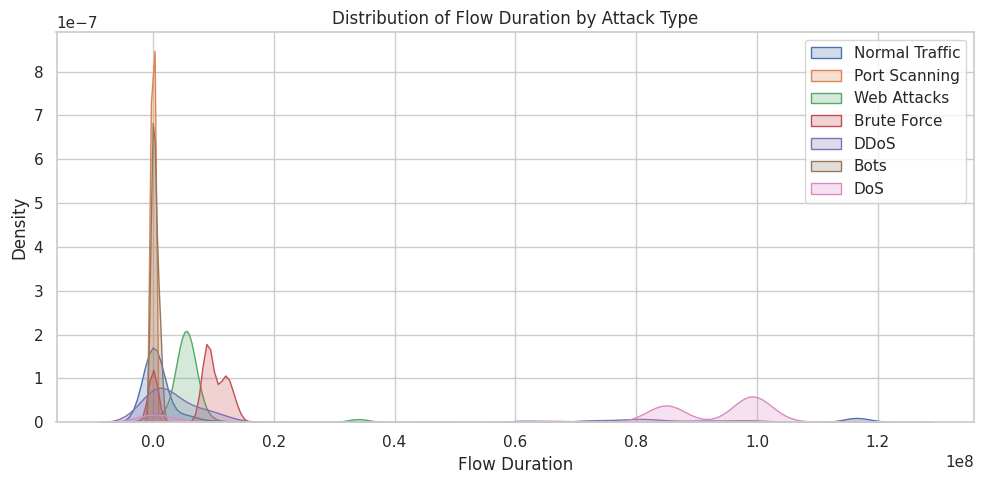

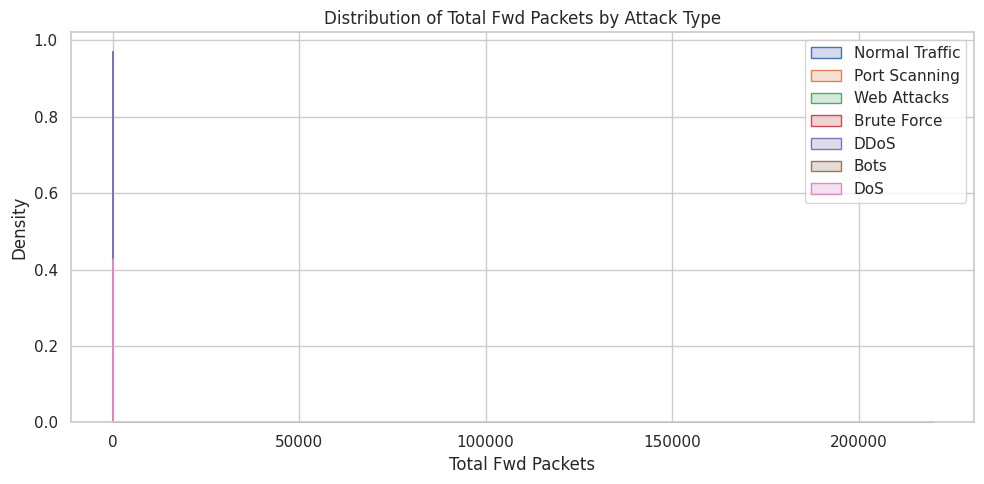

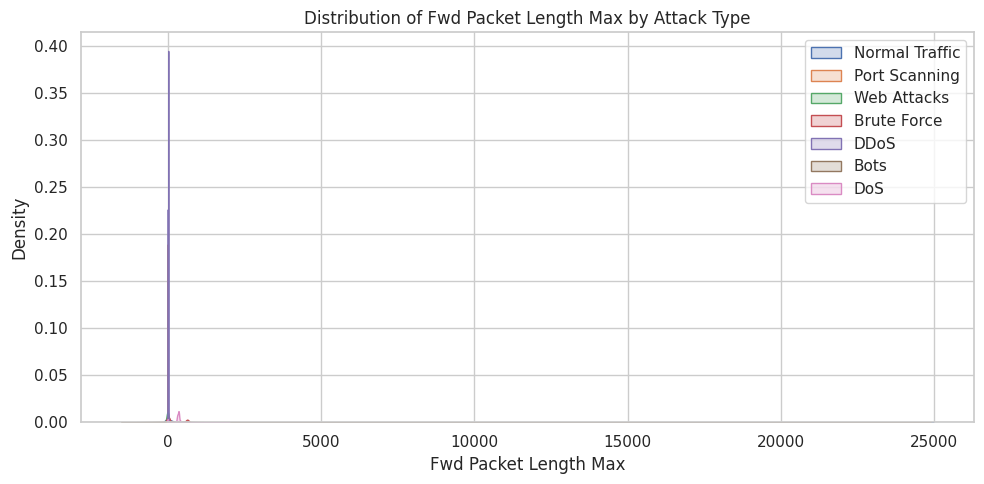

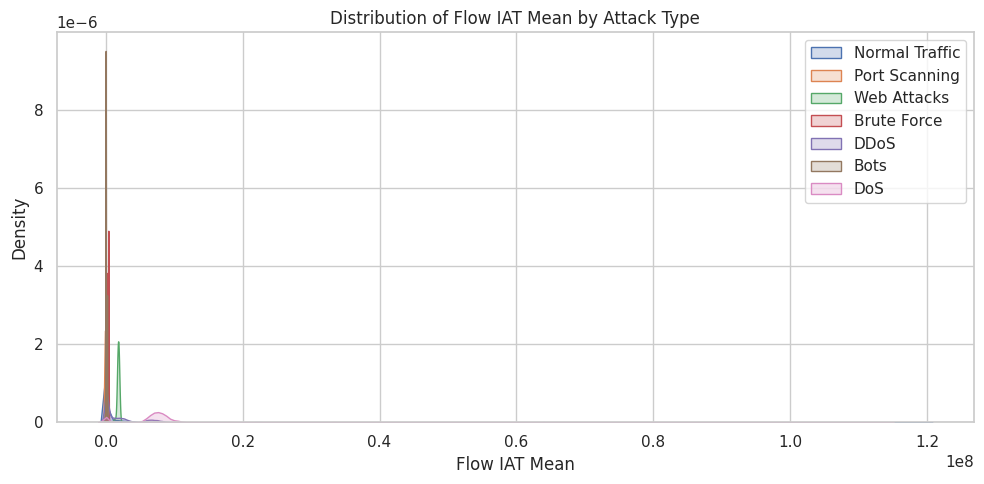

In [18]:
# Feature Distribution by Attack Type
# 9. KDE Plots for distributions
for feature in selected_features:
    plt.figure(figsize=(10, 5))
    for label in df['Attack Type'].unique():
        sns.kdeplot(df[df['Attack Type'] == label][feature], label=label, fill=True)
    plt.title(f'Distribution of {feature} by Attack Type')
    plt.xlabel(feature)
    plt.legend()
    plt.tight_layout()
    plt.show()